# Convolutional Neural Networks.
## Deep Neural Vision. Data Augmentation. Pretrained model.
### Tyamin Ilya (tg: @mrshrimp_it)


## Creating the model (self)

### Setup

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Dataset

170498071/170498071 [==============================] - 3s 0us/step


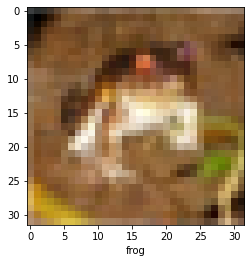

In [ ]:
# Загрузим датасет, разделим его на соответствующие изображения и метки
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализуем значение пикселей на от 0 до 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Для примера отрисуем одно из значений
plt.imshow(train_images[0] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0][0]])
plt.show()

### CNN Architecture

Построем сверточную сеть, собирая ее из сверточных слоев (Conv2D) и слоев пулинга (слои, которые объединяют похожие кривые в разных слоях).

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

1 слой - входной слой с размером (32,32,3) - такой размер входного датасета, функцией активации ReLu, имеет 32 фильтра с размером 3x3

2 слой - слой пулинга, использующий шаблоны 2x2 с шагом 2

3 слой - аналогичен 1-му, только имеет другое количество фильтров

4 слой - аналогичен 2-му

5 слой - аналогичен 3-му

**Так как задача нашей нейронной сети - задача классификации**, то нам нужно использовать DenseNET слои (связанные):

6 слой - Flatten()

7 слой - Dense слой с размером 64 и функцией активации Relu

8 слой - Dense слой с размером 10 (так как выходных классов 10)

Общую информацию о слоях также можно узнать и с помощью команды summary()



In [ ]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compiling, Training and evaluating the model


Используем функцию активции Adam, в качестве функции ошибки кроссэнтропию (все параметры рекомендованы Tensorflow)

Обучаем моделю на 4 эпохах с использованием наших тренировочных изображений. В параметр validation_data передаем тестовые значения. В следующем блоке выведем значение метрики accuracy.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4723 - accuracy: 0.4624 - val_loss: 1.2223 - val_accuracy: 0.5622
Epoch 2/4
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1149 - accuracy: 0.6063 - val_loss: 1.1057 - val_accuracy: 0.6051
Epoch 3/4
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9705 - accuracy: 0.6561 - val_loss: 0.9557 - val_accuracy: 0.6604
Epoch 4/4
1563/1563 [==============================] - 87s 55ms/step - loss: 0.8797 - accuracy: 0.6897 - val_loss: 0.9078 - val_accuracy: 0.6828


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 18ms/step - loss: 0.9078 - accuracy: 0.6828


In [ ]:
print(f"Test accuracy:  {test_acc}")

Test accuracy:  0.6827999949455261


## Working with small datasets. Data Augmentation

Очень часто возникает необходимость работать с маленьким датасетом, причем сделать так, чтобы датасет был разнообразным. Это можно сделать с помощью аугментации изображений, то есть увеличения, поворота, масштабирования изображения. Покажем аугментацию изображения на каком либо примере.

### Setup

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Создаем дата-генератор, который будет изменять изображения
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.3,
height_shift_range=0.3,
shear_range=0.3,
zoom_range=0.3,
horizontal_flip=True,
fill_mode='nearest')


### Image reshaping

Это нам необходимо, чтобы привести изображения к одному размеру (здесь показан пример как мы это будем делать)

In [ ]:
# Для примера, возьмем 100-е изображение
test_img = train_images[100]
img = tf.keras.utils.img_to_array(test_img)  # Сконвентируем изображение в numpy массив
img = img.reshape((1,) + img.shape)  # Измением его размер


### Result of reshaping and augmentation

Покажем, как происходит аугментация изображений

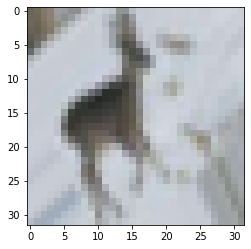

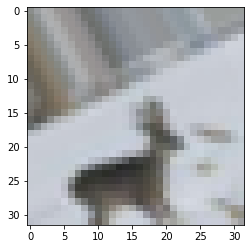

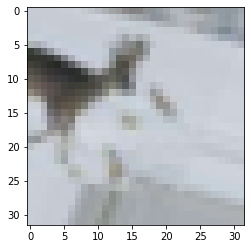

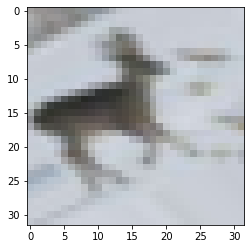

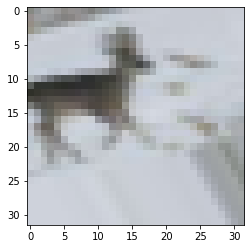

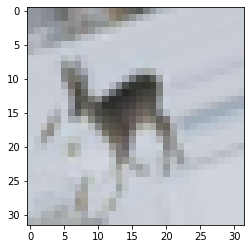

In [ ]:
i = 0

# С помощью этого метода мы БЕСКОНЕЧНО изменяем изображение img, пока не break-мся.
# При этом keras сохраняет его в текущую дирректорию с префиксом test и в формате jpeg
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): 
    plt.figure(i)
    plot = plt.imshow(tf.keras.utils.img_to_array(batch[0]))
    i += 1
    if i > 5:  # покажем 5 аугментированных фото
        break

plt.show()

# Using pretrained models to classify objects

Если мы обучаем нашу модель с нуля, то для реальных в жизни датасетов, точность нашей модели составляет примерно 70%. Однако в качестве базового сверточного слоя мы можем использовать заранее обученные модели (созданные, например, компанией Google и Tensorflow). Тогда, замораживая их обучение, и добавляя сверху классификатор мы можем добиться гораздо более высокого результата.

## Import

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras

import tensorflow_datasets as tfds

## Dataset

Набор данных Stanford Dogs содержит изображения 120 пород собак со всего мира. Этот набор данных был создан с использованием изображений и аннотаций из ImageNet для задачи детальной категоризации изображений. Есть 20 580 изображений, из которых 12 000 используются для обучения и 8580 для тестирования. Метки классов и аннотации ограничивающих рамок предусмотрены для всех 12 000 изображений.


In [117]:
(raw_train, raw_test), metadata = tfds.load(
    'oxford_flowers102',
    split=['train',  'test'],
    with_info=True,
    as_supervised=True,
)

1020

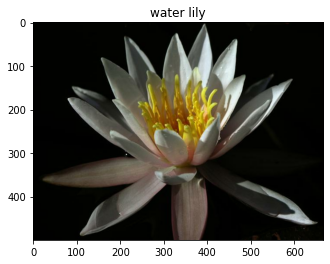

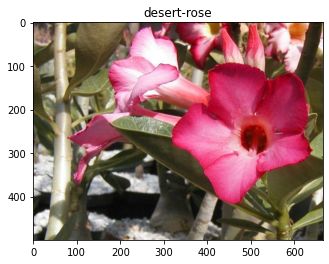

In [118]:
get_label_name = metadata.features['label'].int2str  # анонимный метод для получения названия картинки

# выведем на экран 2 изображения, чтобы быть уверенными, что все ок
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

## Data Preprocessing

Напишем функцию, которая будет приводить все изображения к размеру 160x160, а пиксели к диапазону [0,1]

In [119]:
def format_image(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (160, 160))
  return image, label

С помощью написанной функции приведем все изображения к этому размеру

In [120]:
train_data = raw_train.map(format_image)
test_data = raw_test.map(format_image)

Теперь посмотрим на наши изображения после форматирования

TensorShape([160, 160, 3])

TensorShape([160, 160, 3])

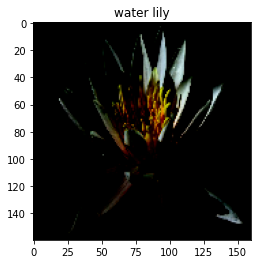

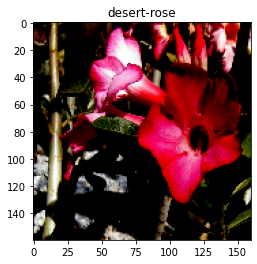

In [121]:
for image, label in train_data.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))
  display(image.shape)

Перемешаем изображения. Поделим их на батчи. 

Важное действие: с помощью метода concatenate объединим все метки (то есть результаты классификации)

In [122]:
BATCH_SIZE = 2
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train_data.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_batches = test_data.batch(BATCH_SIZE)

batches_answers = np.concatenate([y for x, y in test_batches], axis=0)

## Picking a pretrained model.

Возьмем заранее обученную гуглом модель MobileNetV2, она обучена на 1 400 000 изображениях, разделенных на 1000 классов. 

Основная загвоздка в том, что мы хотим ее использовать только как слой, причем чтобы он заранее не переобучался (иначе на это уйдет очень много времени)

In [123]:
IMG_SHAPE = (160, 160, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.summary()

In [124]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(2, 5, 5, 1280)


## Freezing the base and adding the classifier

Заморозим обучение модели, чтобы она не обучалась

In [125]:
base_model.trainable = False

Добавим классификатор и Dense (связывающий) слой. Создадим саму модель

In [126]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(102, activation='softmax')

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

## Training and testing the model

In [128]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Довольно долгий процесс обучения,но это потому что 15 эпох и большой первый слой

In [129]:
history = model.fit(train_batches,
                    epochs=15)

Epoch 1/15
510/510 [==============================] - 27s 42ms/step - loss: 4.5888 - accuracy: 0.0608
Epoch 2/15
510/510 [==============================] - 24s 42ms/step - loss: 3.1192 - accuracy: 0.3265
Epoch 3/15
510/510 [==============================] - 25s 44ms/step - loss: 2.1892 - accuracy: 0.5373
Epoch 4/15
510/510 [==============================] - 24s 42ms/step - loss: 1.5697 - accuracy: 0.6529
Epoch 5/15
510/510 [==============================] - 24s 42ms/step - loss: 1.1966 - accuracy: 0.7461
Epoch 6/15
510/510 [==============================] - 24s 42ms/step - loss: 0.9476 - accuracy: 0.7961
Epoch 7/15
510/510 [==============================] - 24s 42ms/step - loss: 0.7717 - accuracy: 0.8343
Epoch 8/15
510/510 [==============================] - 24s 42ms/step - loss: 0.6613 - accuracy: 0.8480
Epoch 9/15
510/510 [==============================] - 24s 42ms/step - loss: 0.5701 - accuracy: 0.8775
Epoch 10/15
510/510 [==============================] - 26s 42ms/step - loss: 0.514

Предскажем значение для наших тестовых батчей

In [130]:
predictions = model.predict(test_batches)
predictions

3075/3075 [==============================] - 144s 47ms/step


array([[7.28602754e-05, 9.24697019e-07, 1.05831214e-05, ...,
        1.64943524e-02, 1.13443775e-05, 1.46231946e-06],
       [2.36126380e-05, 6.01216357e-08, 3.26752779e-05, ...,
        3.35747153e-02, 4.02896558e-06, 1.35060691e-04],
       [1.45655256e-02, 1.65360018e-06, 9.73851013e-04, ...,
        1.75848678e-02, 3.73599993e-04, 1.22731595e-04],
       ...,
       [1.84458052e-03, 7.33003753e-06, 5.75141821e-05, ...,
        1.21417670e-02, 2.19479784e-06, 5.13802479e-05],
       [8.40824505e-05, 8.19800061e-06, 7.51382031e-05, ...,
        4.28922921e-02, 1.04534129e-05, 1.07781602e-06],
       [1.57125903e-08, 1.13488268e-08, 1.51515978e-05, ...,
        1.51476670e-05, 2.91119359e-04, 5.97280887e-05]], dtype=float32)

1. Сравним для одного:

In [131]:
print(np.argmax(predictions[0]))
print(batches_answers[0])

40
40


2. Сравним для всех:

In [132]:
count = 0
for i in range(len(predictions)):
  if (np.argmax(predictions[i]) == batches_answers[i]):
    count+=1
print(f"Всего примеров: {len(predictions)}. Правильных из них: {count}. Точность: {(count / len(predictions)) *100}")

Всего примеров: 6149. Правильных из них: 4489. Точность: 73.00374044560091


# Using pretrained models to classify images (second example)

Пример 2 - на распознование по нейроциту наличия заболевания малярии (довольно прикладная задача)

## Import

In [143]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras

import tensorflow_datasets as tfds

# Dataset

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.

In [153]:
(raw_train, raw_test), metadata = tfds.load(
    'malaria',
    split=['train[:75%]',  'train[75%:]'],
    with_info=True,
    as_supervised=True,
)

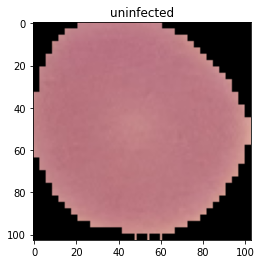

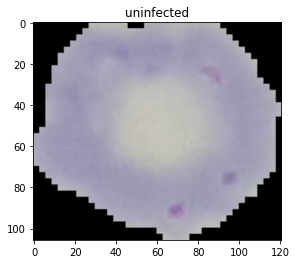

In [154]:
get_label_name = metadata.features['label'].int2str  # анонимный метод для получения названия картинки

# выведем на экран 2 изображения, чтобы быть уверенными, что все ок
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

## Data Preprocessing

Воспользуемся написанной в примере 1 функцией и приведем все изображения к размеру 160x160

In [155]:
train_data = raw_train.map(format_image)
test_data = raw_test.map(format_image)

Посмотрим на наши изображение после форматирования

TensorShape([160, 160, 3])

TensorShape([160, 160, 3])

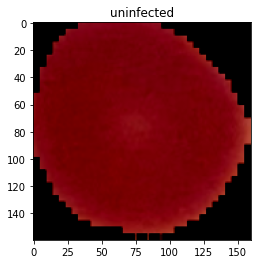

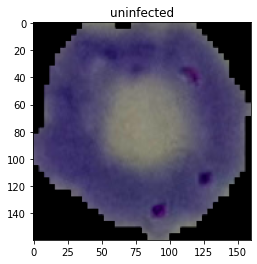

In [156]:
for image, label in train_data.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))
  display(image.shape)

Перемешаем изображения, поделим их на батчи. Скомбинируем в один массив все ответы для тестовых данных

In [157]:
BATCH_SIZE = 2
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train_data.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_batches = test_data.batch(BATCH_SIZE)

batches_answers = np.concatenate([y for x, y in test_batches], axis=0)

## Picking a pretrained model

Возьмем заранее обученную гуглом модель MobileNetV2, она обучена на 1 400 000 изображениях, разделенных на 1000 классов. 

Основная загвоздка в том, что мы хотим ее использовать только как слой, причем чтобы он заранее не переобучался (иначе на это уйдет очень много времени)

In [158]:
IMG_SHAPE = (160, 160, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [159]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(2, 5, 5, 1280)


## Freezing the base and adding the classifier

In [164]:
base_model.trainable = False

Добавим слой пулинга и выходной слой с 2 нейронами (всего может быть 2 выхода - 0 или 1)

In [161]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(len(set(batches_answers)), activation='softmax')

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

## Training and testing the model

In [165]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Обучим модель с помощью 2 эпох (это очень долго, но что поделать)

In [167]:
history = model.fit(train_batches, epochs=2)

Epoch 1/2
10334/10334 [==============================] - 1108s 107ms/step - loss: 0.2337 - accuracy: 0.9146
Epoch 2/2
10334/10334 [==============================] - 1106s 107ms/step - loss: 0.1882 - accuracy: 0.9363


Предскажем значение для тестовых данных

In [168]:
predictions = model.predict(test_batches)
predictions

3445/3445 [==============================] - 168s 49ms/step


array([[1.83375683e-02, 9.81662452e-01, 1.06572267e-15, ...,
        9.48998668e-16, 1.06081888e-15, 2.31488599e-15],
       [9.99441564e-01, 5.58434695e-04, 3.81868795e-15, ...,
        3.89367832e-15, 1.45328609e-15, 5.57437380e-15],
       [9.99994278e-01, 5.71287455e-06, 2.54634727e-15, ...,
        3.10740241e-15, 2.56501693e-15, 3.33856681e-15],
       ...,
       [1.63279325e-02, 9.83672082e-01, 2.89132748e-15, ...,
        3.45148795e-15, 2.32557004e-15, 4.42055314e-15],
       [4.26905416e-02, 9.57309484e-01, 1.90307568e-14, ...,
        2.08805175e-14, 1.74288650e-14, 2.36840238e-14],
       [9.99999166e-01, 8.49113121e-07, 9.84637337e-18, ...,
        2.23869915e-17, 1.11707325e-17, 4.02767971e-17]], dtype=float32)

1. Сравним для одного

In [169]:
print(np.argmax(predictions[0]))
print(batches_answers[0])

1
1


2. Сравним для всех

In [170]:
count = 0
for i in range(len(predictions)):
  if (np.argmax(predictions[i]) == batches_answers[i]):
    count+=1
print(f"Всего примеров: {len(predictions)}. Правильных из них: {count}. Точность: {(count / len(predictions)) *100}")

Всего примеров: 6890. Правильных из них: 6478. Точность: 94.02031930333817
